In [8]:
#Import dependenices
import csv
import pandas as pd
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow as tfm
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
# Specify the path to your CSV file
csv_file_path = 'Resources/Clean_train_scaled.csv'

# Read the CSV file into a DataFrame
loan_data = pd.read_csv(csv_file_path)

#Print size of data set
print(loan_data.shape)

# Display the DataFrame
loan_data.head(5)

(80683, 15)


,Current loan amount,Credit score,Annual income,Monthly debt,Years of credit history,Number of open accounts,Number of credit problems,Current credit balance,Maximum open credit,Long term,Short term,Home mortgage,Own home,Rent,Bankrupt
0,-0.403050,-0.248996,-0.195065,-1.088060,-0.139697,-1.023574,1.699378,-0.175312,-0.046075,0,1,1,0,0,0
1,2.458067,-0.227302,0.789666,0.872983,-0.467973,1.363133,1.699378,0.007629,0.002270,0,1,0,1,0,0
2,-0.405859,-0.240861,-0.528623,-0.799685,-0.881886,-0.426898,-0.348918,-0.101568,-0.050396,1,0,0,1,0,0
3,-0.409913,4.212629,-0.445444,-0.176207,-0.125424,-1.023574,-0.348918,-0.209072,-0.067003,0,1,1,0,0,0
4,-0.409596,-0.234759,-0.179614,-0.626914,0.202852,0.368672,1.699378,-0.453159,-0.067061,0,1,1,0,0,0


# Machine Learning Models

### Ensemble Model

In [ ]:
# Step 1: Read the Clean_train_scaled.csv data from the Resources folder into a Pandas DataFrame.

In [18]:
# Specify the path to your CSV file
csv_file_path = 'Resources/Clean_train_scaled.csv'

# Read the CSV file into a DataFrame
loan_data = pd.read_csv(csv_file_path)

#Print size of data set
print(loan_data.shape)

# Display the DataFrame
loan_data.head(5)

(80683, 15)


,Current loan amount,Credit score,Annual income,Monthly debt,Years of credit history,Number of open accounts,Number of credit problems,Current credit balance,Maximum open credit,Long term,Short term,Home mortgage,Own home,Rent,Bankrupt
0,-0.403050,-0.248996,-0.195065,-1.088060,-0.139697,-1.023574,1.699378,-0.175312,-0.046075,0,1,1,0,0,0
1,2.458067,-0.227302,0.789666,0.872983,-0.467973,1.363133,1.699378,0.007629,0.002270,0,1,0,1,0,0
2,-0.405859,-0.240861,-0.528623,-0.799685,-0.881886,-0.426898,-0.348918,-0.101568,-0.050396,1,0,0,1,0,0
3,-0.409913,4.212629,-0.445444,-0.176207,-0.125424,-1.023574,-0.348918,-0.209072,-0.067003,0,1,1,0,0,0
4,-0.409596,-0.234759,-0.179614,-0.626914,0.202852,0.368672,1.699378,-0.453159,-0.067061,0,1,1,0,0,0


In [ ]:
# Step 2: Create the labels set (y) from the “Rent” column, and then create the features (X) DataFrame from the remaining columns.

In [19]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = loan_data['Bankrupt']

# Separate the X variable, the features
X = loan_data.drop(columns=['Bankrupt'])

In [20]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Bankrupt, dtype: int64

In [21]:
# Review the X variable DataFrame
X.head()

,Current loan amount,Credit score,Annual income,Monthly debt,Years of credit history,Number of open accounts,Number of credit problems,Current credit balance,Maximum open credit,Long term,Short term,Home mortgage,Own home,Rent
0,-0.403050,-0.248996,-0.195065,-1.088060,-0.139697,-1.023574,1.699378,-0.175312,-0.046075,0,1,1,0,0
1,2.458067,-0.227302,0.789666,0.872983,-0.467973,1.363133,1.699378,0.007629,0.002270,0,1,0,1,0
2,-0.405859,-0.240861,-0.528623,-0.799685,-0.881886,-0.426898,-0.348918,-0.101568,-0.050396,1,0,0,1,0
3,-0.409913,4.212629,-0.445444,-0.176207,-0.125424,-1.023574,-0.348918,-0.209072,-0.067003,0,1,1,0,0
4,-0.409596,-0.234759,-0.179614,-0.626914,0.202852,0.368672,1.699378,-0.453159,-0.067061,0,1,1,0,0


In [22]:
# Check the balance of our target values
y.value_counts()

Bankrupt
0    80240
1      443
Name: count, dtype: int64

In [ ]:
# Step 3: Split the data into training and testing datasets by using train_test_split.

In [23]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Create a Logistic Regression Model with the Original Data
# Step 1:Fit a logistic regression model by using the training data (X_train and y_train).

In [24]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

In [ ]:
# Step 2: Save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model.

In [25]:
# Make a prediction using the testing data
LR_predictions = lr_model.predict(X_test)

In [26]:
# Make a prediction using the testing data
test_predictions = logistic_regression_model.predict(X_test)
pd.DataFrame({'Predictions': test_predictions, 'Actual': y_test})

,Predictions,Actual
15935,0,0
57347,0,0
48961,0,0
14717,0,0
15551,0,0
...,...,...
33849,0,0
9311,0,0
42846,0,0
25742,0,0


In [ ]:
# Step 3: Evaluate the model’s performance by doing the following:
# 1. Generate Confusion Matrix
# 2. Print Classification report

In [27]:
# Generate a confusion matrix for the model
cf_test_matrix = confusion_matrix(y_test, test_predictions)
cf_test_matrix 

array([[20045,    30],
       [   86,    10]], dtype=int64)

In [28]:
cm_imbalanced = confusion_matrix(y_test, LR_predictions)
cm_imbalanced_df = pd.DataFrame(cm_imbalanced, 
                                index = ['Actual Healthy Loans (low-risk)', 
                                'Actual Non-Healthy Loans (high-risk)'], 
                                columns = ['Predicted Healthy Loans (low-risk)', 'Predicted Non-Healthy Loans (high-risk)']
                              )
cm_imbalanced_df

,Predicted Healthy Loans (low-risk),Predicted Non-Healthy Loans (high-risk)
Actual Healthy Loans (low-risk),20045,30
Actual Non-Healthy Loans (high-risk),86,10


In [29]:
# Print the classification report for the model
testing_report = classification_report(y_test, test_predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20075
           1       0.25      0.10      0.15        96

    accuracy                           0.99     20171
   macro avg       0.62      0.55      0.57     20171
weighted avg       0.99      0.99      0.99     20171



In [ ]:
# My balanced accuracy score is 55%!  It takes into account both sensitivity (true positive rate) and specificity 
#(true negative rate) to measure the performance of my model, especially when dealing with imbalanced datasets. With 80,240 rejected
loans and only 443 accepted ones. It’s important to have metric that considers this imbalance.

# And guess what? My model’s accuracy score is a whopping 99% That means it correctly predicted 99% of all loans in the dataset.That’s 
# pretty incredible right?

Looking at the confusion matrix my model did a great job by accepting 20,045 healthy loans and rejecting 10 high-risk loans accurately.
However, they were a few cases where it made some mistakes like rejecting 30 healthy loans and accepting 86 high-risk loans. But 
overall, it seems like my model is doing a fantastic job.

# Precision and recall are also important measures. My model has a precision score of 25% for default loans and perfect 100% for healthy 
loans. This shows how well my prediction matched reality. And when it comes to recall which looks at how well reality matched the 
predictions my model scored 10% for default loans and 100% for healthy loans.

# Finally, the F1 score. It’s the weighted average of precision and recall scores, and it is the great way to evaluate the overall 
# performance of my model. F1 score is 15% for default loans 100% for healthy loans.

In [30]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

In [31]:
# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ROS_model = RandomOverSampler(random_state = 1)

In [32]:
# Fit the original training data to the random_oversampler model
X_oversampled, y_oversampled = ROS_model.fit_resample(X_train, y_train)

In [33]:
# Count the distinct values of the resampled labels data
y_oversampled.value_counts()

Bankrupt
1    60165
0    60165
Name: count, dtype: int64

In [34]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
LR_oversampled_model = LogisticRegression(random_state = 1)

In [35]:
# Fit the model using the resampled training data
LR_oversampled_model.fit(X_oversampled, y_oversampled)

LogisticRegression(random_state=1)

In [36]:
# Make a prediction using the testing data
LR_oversampled_pred = LR_oversampled_model.predict(X_test)

In [37]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, LR_oversampled_pred)

0.9937982565379826

In [38]:
# Generate a confusion matrix for the model
cm_oversampled = confusion_matrix(y_test, LR_oversampled_pred)
cm_oversampled_df = pd.DataFrame(cm_oversampled, 
                                index = ['Actual Healthy Loans (low-risk)', 
                                'Actual Non-Healthy Loans (high-risk)'], 
                                columns = ['Predicted Healthy Loans (low-risk)', 'Predicted Non-Healthy Loans (high-risk)']
                              )
cm_oversampled_df

,Predicted Healthy Loans (low-risk),Predicted Non-Healthy Loans (high-risk)
Actual Healthy Loans (low-risk),19826,249
Actual Non-Healthy Loans (high-risk),0,96


In [ ]:
'''
-- There were 19,286 loan status's that are healthy, and 96 high risk non healthy loans which were predicted correctly. 

-- 249 loan status's that are non-healthy (low-risk), the model 
   predicted predicted wrongly. '''

In [39]:
# Print the classification report for the model
print(classification_report(y_test, LR_oversampled_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     20075
           1       0.28      1.00      0.44        96

    accuracy                           0.99     20171
   macro avg       0.64      0.99      0.71     20171
weighted avg       1.00      0.99      0.99     20171



In [40]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

rf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

C:\Users\wambu\anaconda3\envs\PythonData\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\wambu\anaconda3\envs\PythonData\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


In [41]:
# Calculated the balanced accuracy score
from sklearn.metrics import accuracy_score
y_pred = rf_model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.9876059689653462


In [42]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

matrix = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    matrix, index=["Actual High-Risk", "Actual Low-Risk"], columns=["Predicted High_Risk", "Prediceted Low_Risk"])
cm_df

,Predicted High_Risk,Prediceted Low_Risk
Actual High-Risk,19825,250
Actual Low-Risk,0,96


In [43]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      1.00      0.99      0.99      0.99     20075
          1       0.28      1.00      0.99      0.43      0.99      0.99        96

avg / total       1.00      0.99      1.00      0.99      0.99      0.99     20171



In [44]:
# List the features sorted in descending order by feature importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.6843864465355326, 'Number of credit problems'),
 (0.09780563646684479, 'Current credit balance'),
 (0.055093146001218125, 'Maximum open credit'),
 (0.03322548124601038, 'Years of credit history'),
 (0.02694324593050533, 'Monthly debt'),
 (0.026634700496333614, 'Credit score'),
 (0.02409310535734401, 'Current loan amount'),
 (0.02111395118225479, 'Annual income'),
 (0.016586406977235544, 'Number of open accounts'),
 (0.004496899318547471, 'Home mortgage'),
 (0.002571967488757595, 'Short term'),
 (0.0024227738661023795, 'Rent'),
 (0.0023578990736024402, 'Own home'),
 (0.0022683400597110722, 'Long term')]

In [ ]:
#Easy Ensemble AdaBoost Classifier

In [45]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier

eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [46]:
# Calculated the balanced accuracy score
from sklearn.metrics import accuracy_score
y_pred = eec.predict(X_test)
acc_score2 = accuracy_score(y_test, y_pred)
print(acc_score2)

0.9876059689653462


In [47]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm_df = pd.DataFrame(
    matrix, index=["Actual High-Risk", "Actual Low-Risk"], columns=["Predicted High_Risk", "Prediceted Low_Risk"])
cm_df

,Predicted High_Risk,Prediceted Low_Risk
Actual High-Risk,19825,250
Actual Low-Risk,0,96


In [48]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      1.00      0.99      0.99      0.99     20075
          1       0.28      1.00      0.99      0.43      0.99      0.99        96

avg / total       1.00      0.99      1.00      0.99      0.99      0.99     20171



In [54]:
import seaborn as sns

sns.set_style('darkgrid')

In [55]:
# Correlation between features

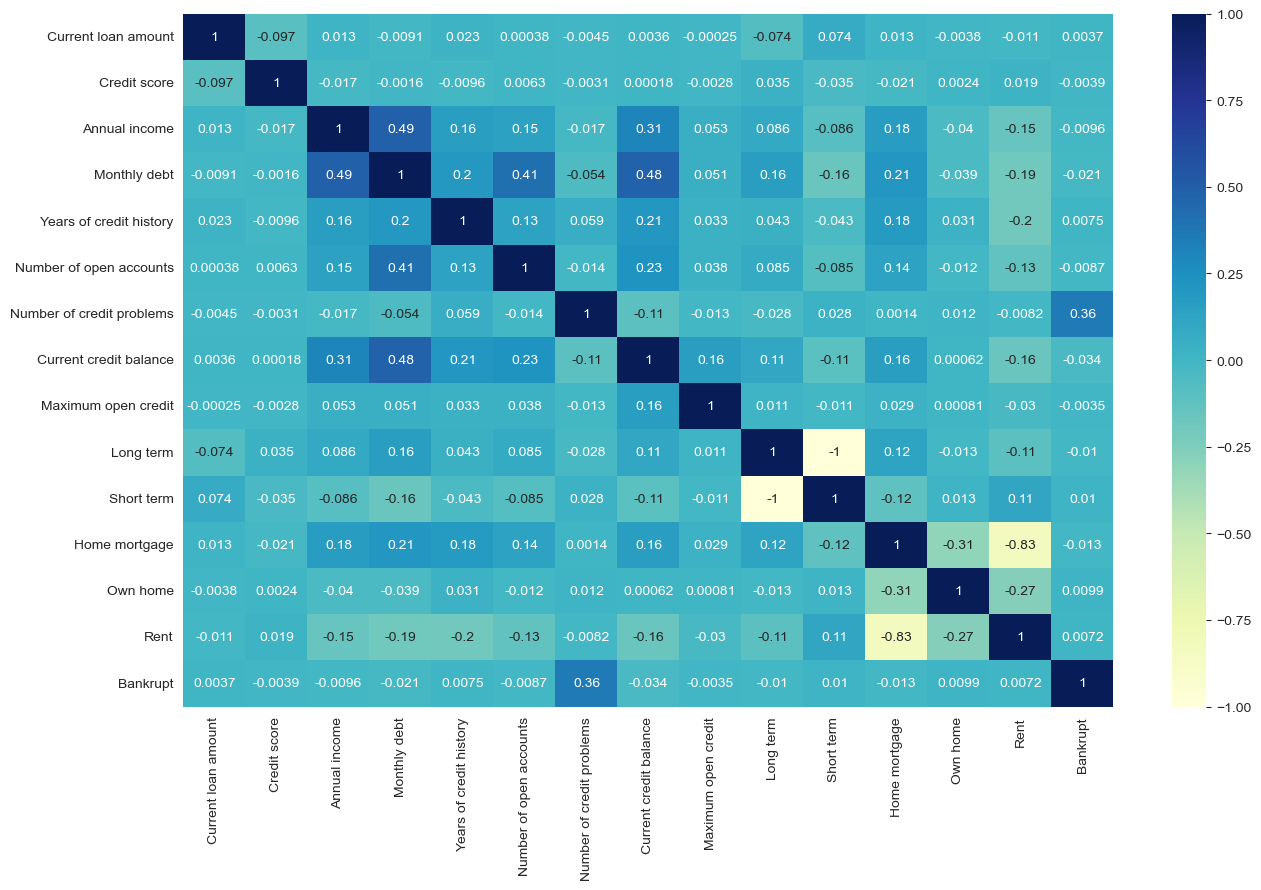

In [56]:
plt.figure(figsize=(15,9))
sns.heatmap(loan_data.corr(), annot = True, cmap='YlGnBu')
plt.show()